In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn

numpy = lambda x : x.detach().cpu().numpy().squeeze()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import pyrtools as pt
import plenoptic as po

%load_ext autoreload
%autoreload 2

In [3]:
def convert_pyrshow(pyr_coeffs, image_index):

    pyr_coeff = {}
    for k in pyr_coeffs.keys():
        pyr_coeff[k] = pyr_coeffs[k][image_index].data.detach().cpu().numpy().squeeze()

    return pyr_coeff

In [4]:
class LG(nn.Module):
    """


    """
    def __init__(self, verbose=True):
        super(LG, self).__init__()

        self.verbose = verbose

        self.L1 = po.simul.Steerable_Pyramid_Freq([256, 256], order=1, height=5)
        self.G1 = po.simul.non_linearities.local_gain_control
        
    def forward(self, image, get_list=True):

        activation1 = self.L1(image)
        
        norm1, self.direction1 = self.G1(activation1, residuals=False)

        if get_list:
            return [k for k in norm1.values()]
        else:
            return norm1

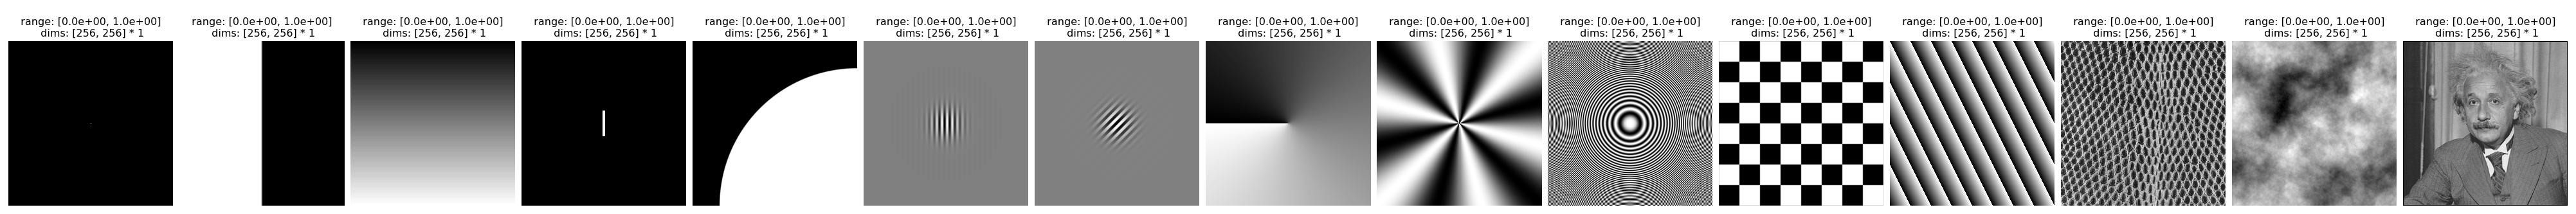

In [5]:
stimuli = po.make_basic_stimuli()
pt.imshow(numpy(stimuli));

In [6]:
lg = LG()

In [7]:
y = lg.forward(stimuli, get_list=False)

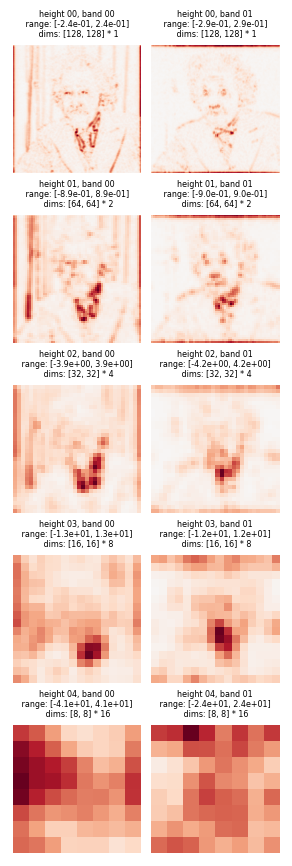

In [8]:
pt.pyrshow(convert_pyrshow(y, -1), zoom=1, vrange='indep0');

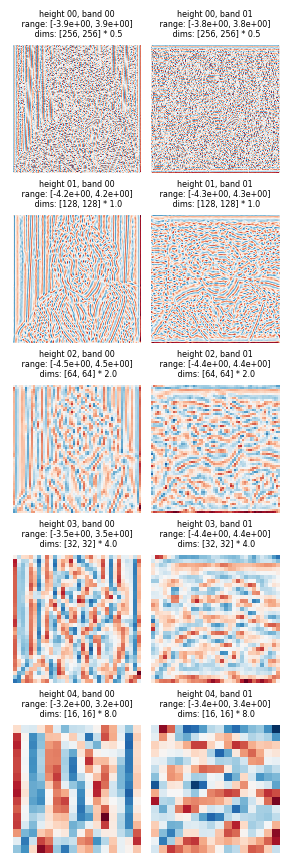

In [9]:
pt.pyrshow(convert_pyrshow(lg.direction1, -1), zoom=.5, vrange='indep0');

In [10]:
e = po.synth.Eigendistortion(stimuli[-1:], lg)

In [11]:
distortions = e.synthesize(tol=1e-4, n_steps=100)

out size torch.Size([43648, 1]) in size torch.Size([65536, 1])
implicit power method, computing the maximum distortion
0 [18.460228]
1 [7.677147]
2 [5.862137]
3 [5.8065567]
4 [5.5905304]
5 [5.0094147]
6 [4.408432]
7 [3.94796]
8 [3.5244217]
9 [3.011757]
10 [2.4064255]
11 [1.7950745]
12 [1.2646484]
13 [0.8536606]
14 [0.5599518]
15 [0.36073303]
16 [0.22903442]
17 [0.14530945]
18 [0.09156799]
19 [0.05776978]
20 [0.0365448]
21 [0.02310181]
22 [0.01462555]
23 [0.00888824]
24 [0.00617981]
25 [0.00430298]
26 [0.00200653]
27 [0.00158691]
28 [0.00136566]
29 [0.00018311]
30 [0.00059509]
31 [0.00065613]
32 [0.00010681]
33 [0.00032043]
34 [6.1035156e-05]
implicit power method, computing the minimum distortion
0 [11.264221]
1 [7.0498466]
2 [4.2206497]
3 [2.725151]
4 [1.940052]
5 [1.4710789]
6 [1.1502767]
7 [0.9125829]
8 [0.7300992]
9 [0.5886636]
10 [0.4786234]
11 [0.39306736]
12 [0.32633543]
13 [0.27419233]
14 [0.23319626]
15 [0.2007184]
16 [0.17478561]
17 [0.15388608]
18 [0.13687634]
19 [0.12287593

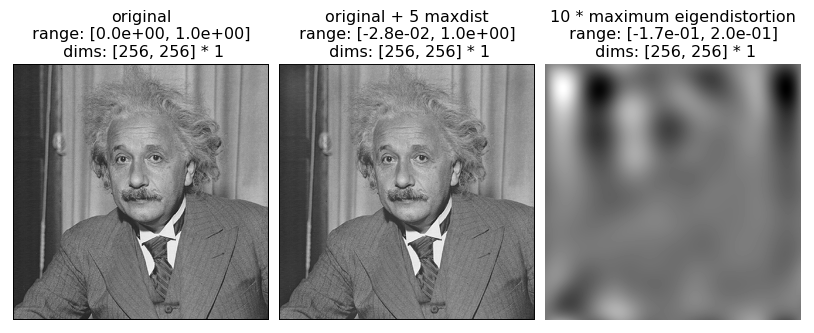

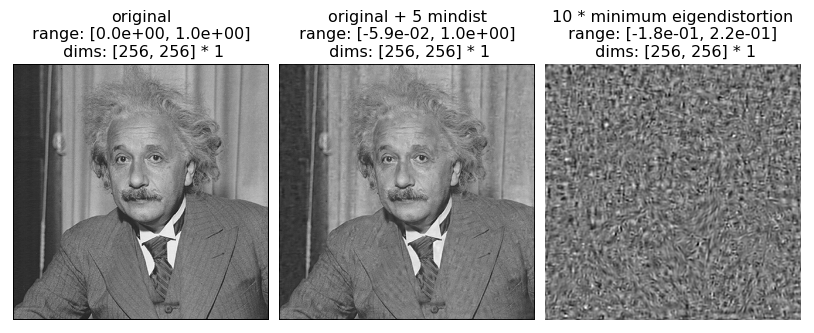

In [12]:
e.display()

In [13]:
m = po.synth.Metamer(stimuli[-1:], lg)

In [14]:
m.synthesize()

100%|██████████| 100/100 [00:21<00:00,  4.91it/s, gradient_norm=2.5097e+00, learning_rate=0.01, loss=6.1978e+01]


(tensor([[0.5619, 0.8330, 0.1544,  ..., 0.4307, 0.2743, 0.3821],
         [0.0798, 0.7998, 0.3355,  ..., 0.7566, 0.4382, 0.8856],
         [0.4470, 0.3984, 0.7115,  ..., 0.2519, 0.4868, 1.0209],
         ...,
         [0.3560, 0.5128, 0.3673,  ..., 1.0443, 0.4656, 0.9026],
         [0.1482, 0.9606, 0.6669,  ..., 0.1219, 0.7744, 0.2023],
         [0.9493, 0.4432, 0.1535,  ..., 0.0882, 0.4990, 0.7747]]),
 tensor([0.1455, 0.1691, 0.1572,  ..., 8.4928, 8.9990, 8.5475]))

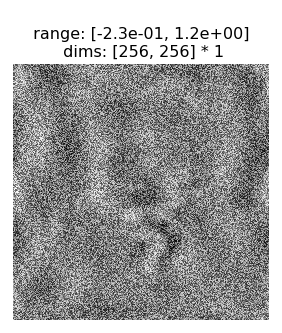

In [15]:
pt.imshow(numpy(m.matched_image));

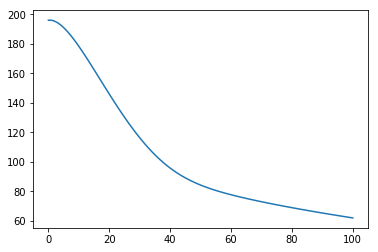

In [16]:
plt.plot(m.loss)